In [370]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [371]:
df = pd.read_csv('customer_booking.csv' , encoding='latin-1')

In [372]:
from sklearn.preprocessing import OneHotEncoder

In [373]:
df.sales_channel

0        Internet
1        Internet
2        Internet
3        Internet
4        Internet
           ...   
49995    Internet
49996    Internet
49997    Internet
49998    Internet
49999    Internet
Name: sales_channel, Length: 50000, dtype: object

In [374]:

df_prep = df.copy()
for column_name in df.select_dtypes('object'):
    print(column_name)
    sres_new = OH.fit_transform(df[[column_name]])
    sres_new_df = pd.DataFrame(sres_new.toarray() , columns=OH.get_feature_names_out(), index=df.index)
    df_prep = pd.concat([df_prep , sres_new_df],axis=1)






sales_channel
trip_type
flight_day
route
booking_origin


In [375]:
def object_columns_remover(dataF):
    for i in dataF.select_dtypes('object'):
        dataF.drop(i,inplace=True,axis=1)
        
    return dataF

object_columns_remover(df_prep)


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLDEL,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLMRU,route_AKLPEK,route_AKLPVG,route_AKLTPE,route_AORICN,route_AORKIX,route_AORKTM,route_AORMEL,route_AORPER,route_AORPUS,route_BBIMEL,route_BBIOOL,route_BBIPER,route_BBISYD,route_BDOCTS,route_BDOCTU,route_BDOHGH,route_BDOICN,route_BDOIKA,route_BDOKIX,route_BDOMEL,route_BDOOOL,route_BDOPEK,route_BDOPER,route_BDOPUS,route_BDOPVG,route_BDOSYD,route_BDOTPE,route_BDOWUH,route_BDOXIY,route_BKICKG,route_BKICTS,route_BKICTU,route_BKIDEL,route_BKIHND,route_BKIICN,route_BKIKIX,route_BKIKTM,route_BKIMEL,route_BKIMRU,route_BKIOOL,route_BKIPEK,route_BKIPER,route_BKIPUS,route_BKIPVG,route_BKISYD,route_BKIXIY,route_BLRICN,route_BLRMEL,route_BLRPER,route_BLRSYD,route_BOMMEL,route_BOMOOL,route_BOMPER,route_BOMSYD,route_BTJJED,route_BTUCKG,route_BTUICN,route_BTUPER,route_BTUSYD,route_BTUWUH,route_BWNCKG,route_BWNDEL,route_BWNHGH,route_BWNIKA,route_BWNKTM,route_BWNMEL,route_BWNOOL,route_BWNPER,route_BWNSYD,route_BWNTPE,route_BWNWUH,route_CANDEL,route_CANIKA,route_CANMEL,route_CANMRU,route_CANOOL,route_CANPER,route_CANSYD,route_CCUMEL,route_CCUMRU,route_CCUOOL,route_CCUPER,route_CCUSYD,route_CCUTPE,route_CEBMEL,route_CEBOOL,route_CEBPER,route_CEBSYD,route_CGKCKG,route_CGKCTS,route_CGKCTU,route_CGKDEL,route_CGKHGH,route_CGKHND,route_CGKICN,route_CGKIKA,route_CGKJED,route_CGKKIX,route_CGKKTM,route_CGKMEL,route_CGKMRU,route_CGKOOL,route_CGKPEK,route_CGKPER,route_CGKPUS,route_CGKPVG,route_CGKSYD,route_CGKTPE,route_CGKWUH,route_CGKXIY,route_CKGCOK,route_CKGDPS,route_CKGHKT,route_CKGJHB,route_CKGKCH,route_CKGKNO,route_CKGLGK,route_CKGLOP,route_CKGMAA,route_CKGMEL,route_CKGMRU,route_CKGMYY,route_CKGOOL,route_CKGPEN,route_CKGPER,route_CKGPNH,route_CKGSBW,route_CKGSGN,route_CKGSIN,route_CKGSUB,route_CKGSYD,route_CKGTGG,route_CKGTRZ,route_CKGTWU,route_CMBCTS,route_CMBCTU,route_CMBHGH,route_CMBHND,route_CMBICN,route_CMBKIX,route_CMBMEL,route_CMBMRU,route_CMBOOL,route_CMBPEK,route_CMBPER,route_CMBPVG,route_CMBSYD,route_CMBWUH,route_CNXDEL,route_CNXHND,route_CNXICN,route_CNXKIX,route_CNXMEL,route_CNXOOL,route_CNXPEK,route_CNXPER,route_CNXPUS,route_CNXPVG,route_CNXSYD,route_CNXTPE,route_CNXXIY,route_COKCTS,route_COKCTU,route_COKHGH,route_COKICN,route_COKKIX,route_COKMEL,route_COKOOL,route_COKPER,route_COKPUS,route_COKSYD,route_COKTPE,route_COKWUH,route_CRKMEL,route_CRKOOL,route_CRKSYD,route_CSXMRU,route_CSXPER,route_CSXSYD,route_CTSDMK,route_CTSDPS,route_CTSHKT,route_CTSJHB,route_CTSJOG,route_CTSKBR,route_CTSKCH,route_CTSKNO,route_CTSLGK,route_CTSMEL,route_CTSMYY,route_CTSOOL,route_CTSPEN,route_CTSPER,route_CTSSBW,route_CTSSGN,route_CTSSIN,route_CTSSUB,route_CTSSYD,route_CTUDMK,route_CTUDPS,route_CTUHKT,route_CTUIKA,route_CTUJHB,route_CTUKBR,route_CTUKBV,route_CTUKCH,route_CTUKNO,route_CTULGK,route_CTULOP,route_CTUMAA,route_CTUMEL,route_CTUMLE,route_CTUMRU,route_CTUMYY,route_CTUOOL,route_CTUPEN,route_CTUPER,route_CTUREP,route_CTUSBW,route_CTUSGN,route_CTUSIN,...,route_MLEPER,route_MLEPVG,route_MLESYD,route_MLETPE,route_MNLMRU,route_MNLOOL,route_MNLPER,route_MNLSYD,route_MRUOOL,route_MRUPEK,route_MRUPEN,route_MRUPER,route_MRUPVG,route_MRUSGN,route_MRUSIN,route_MRUSUB,route_MRUSYD,route_MRUSZX,route_MRUTPE,route_MRUXIY,route_MYYOOL,route_MYYPER,route_MYYPUS,route_MYYSYD,route_MYYXIY,route_NRTSYD,route_OOLPEK,route_OOLPEN,route_OOLPNH,route_OOLPUS,route_OOLPVG,route_OOLREP,route_OOLRGN,route_OOLSBW,route_OOLSDK,route_OOLSGN,route_OOLSIN,route_OOLSUB,route_OOLSZX,route_OOLTGG,route_OOLTPE,route_OOLTRZ,route_OOLTWU,route_OOLURT,route_OOLUTP,route_OOLVTE,route_OOLWUH,route_OOLXIY,route_PEKPEN,route_PEKPER,route_PEK

In [376]:
## random forest 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report ,accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [377]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [378]:
df_prep.booking_complete.value_counts()


booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [379]:
## balancing data

In [380]:
df_prep2 = pd.concat([df_prep[df_prep['booking_complete']==1].sample(7478),
                      df_prep[df_prep['booking_complete']==0].sample(8000)],
                    axis=0,ignore_index=True)

X= df_prep2.drop('booking_complete',axis=1)
y= df_prep2.booking_complete


xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.70,random_state=101)

In [381]:
## test 1

In [382]:
y.value_counts()

booking_complete
0    8000
1    7478
Name: count, dtype: int64

In [383]:
RC1 = RandomForestClassifier(max_depth=50,min_samples_split=5,random_state=101)

In [384]:
RC1.fit(xtrain,ytrain)
pre1=RC1.predict(xtest)


In [385]:

samp = pre1

Creport = classification_report(samp,ytest)
accuracy = accuracy_score(samp,ytest)
precision = precision_score(samp,ytest)
f1 = f1_score(samp,ytest)
confusionMatrix = confusion_matrix(samp,ytest)
recall = recall_score(samp,ytest)

print(Creport+'\n\n\n')
print(f' accuracy is : {accuracy} \n f1 is : {f1} \n recall is : {recall} \n precision is : {precision}')
print('\n'+'---'*40+'\n')
print(confusionMatrix)

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      2238
           1       0.74      0.69      0.72      2406

    accuracy                           0.71      4644
   macro avg       0.71      0.71      0.71      4644
weighted avg       0.72      0.71      0.71      4644




 accuracy is : 0.7142549526270456 
 f1 is : 0.7157849646605269 
 recall is : 0.6945137157107232 
 precision is : 0.7384003535130358

------------------------------------------------------------------------------------------------------------------------

[[1646  592]
 [ 735 1671]]


In [386]:
#####################

In [387]:
df_prep2 = pd.concat([df_prep[df_prep['booking_complete']==1].sample(7478),
                      df_prep[df_prep['booking_complete']==0].sample(8500)],
                    axis=0,ignore_index=True)

X= df_prep2.drop('booking_complete',axis=1)
y= df_prep2.booking_complete


xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.70,random_state=101)

In [388]:
RC1.fit(xtrain,ytrain)
pre2=RC1.predict(xtest)


In [389]:

samp = pre2

Creport = classification_report(samp,ytest)
accuracy = accuracy_score(samp,ytest)
precision = precision_score(samp,ytest)
f1 = f1_score(samp,ytest)
confusionMatrix = confusion_matrix(samp,ytest)
recall = recall_score(samp,ytest)

print(Creport+'\n\n\n')
print(f' accuracy is : {accuracy} \n f1 is : {f1} \n recall is : {recall} \n precision is : {precision}')
print('\n'+'---'*40+'\n')
print(confusionMatrix)

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      2433
           1       0.73      0.70      0.72      2361

    accuracy                           0.73      4794
   macro avg       0.73      0.73      0.73      4794
weighted avg       0.73      0.73      0.73      4794




 accuracy is : 0.728619107217355 
 f1 is : 0.718337302446417 
 recall is : 0.7026683608640406 
 precision is : 0.7347209920283436

------------------------------------------------------------------------------------------------------------------------

[[1834  599]
 [ 702 1659]]


In [390]:
#scaling 

In [391]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X=mms.fit_transform(X)


In [392]:
RC1 = RandomForestClassifier(max_depth=50,min_samples_split=5,random_state=101)

In [393]:
RC1.fit(xtrain,ytrain)
pre3=RC1.predict(xtest)


In [394]:

samp = pre3
print(samp)

Creport = classification_report(samp,ytest)
accuracy = accuracy_score(samp,ytest)
precision = precision_score(samp,ytest)
f1 = f1_score(samp,ytest)
confusionMatrix = confusion_matrix(samp,ytest)
recall = recall_score(samp,ytest)

print(Creport+'\n\n\n')
print(f' accuracy is : {accuracy} \n f1 is : {f1} \n recall is : {recall} \n precision is : {precision}')
print('\n'+'---'*40+'\n')
print(confusionMatrix)

[1 1 1 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      2433
           1       0.73      0.70      0.72      2361

    accuracy                           0.73      4794
   macro avg       0.73      0.73      0.73      4794
weighted avg       0.73      0.73      0.73      4794




 accuracy is : 0.728619107217355 
 f1 is : 0.718337302446417 
 recall is : 0.7026683608640406 
 precision is : 0.7347209920283436

------------------------------------------------------------------------------------------------------------------------

[[1834  599]
 [ 702 1659]]


In [395]:
RC1 = RandomForestClassifier(max_depth=50,min_samples_split=5,random_state=101)

RC1.fit(xtrain,ytrain)
pre3=RC1.predict(xtest)
print(pre3)


samp = pre3

Creport = classification_report(samp,ytest)
accuracy = accuracy_score(samp,ytest)
precision = precision_score(samp,ytest)
f1 = f1_score(samp,ytest)
confusionMatrix = confusion_matrix(samp,ytest)
recall = recall_score(samp,ytest)

print(Creport+'\n\n\n')
print(f' accuracy is : {accuracy} \n f1 is : {f1} \n recall is : {recall} \n precision is : {precision}')
print('\n'+'---'*40+'\n')
print(confusionMatrix)

[1 1 1 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      2433
           1       0.73      0.70      0.72      2361

    accuracy                           0.73      4794
   macro avg       0.73      0.73      0.73      4794
weighted avg       0.73      0.73      0.73      4794




 accuracy is : 0.728619107217355 
 f1 is : 0.718337302446417 
 recall is : 0.7026683608640406 
 precision is : 0.7347209920283436

------------------------------------------------------------------------------------------------------------------------

[[1834  599]
 [ 702 1659]]


In [396]:
samp

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9135371959942775

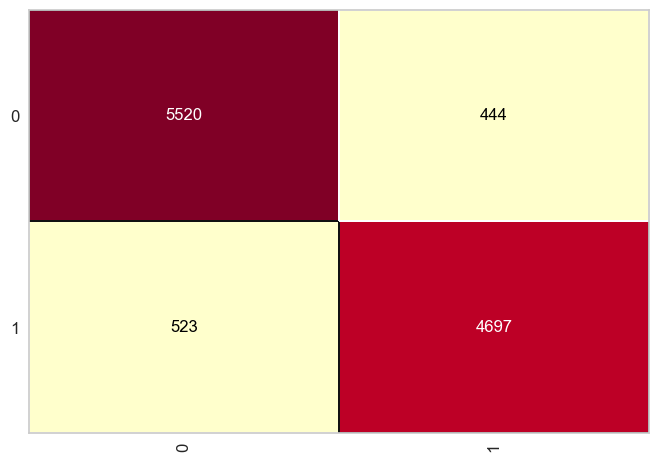

In [397]:
from yellowbrick.classifier import ConfusionMatrix as confm
cm = confm(RC1, classes=[0,1])
cm.fit(xtrain, ytrain)

cm.score(xtrain, ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.728619107217355

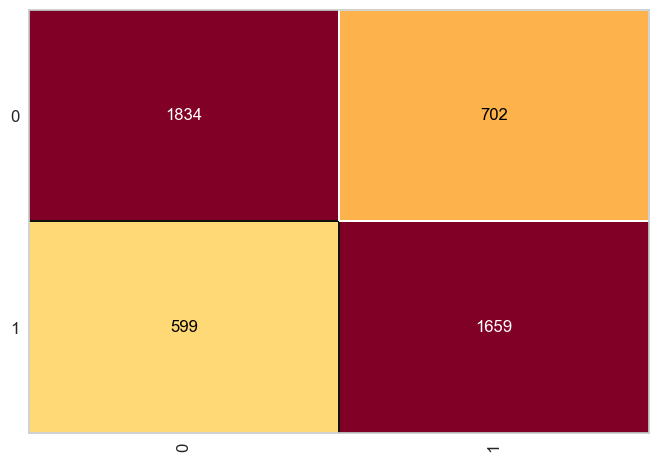

In [398]:
from yellowbrick.classifier import ConfusionMatrix as confm
cm = confm(RC1, classes=[0,1])
cm.fit(xtrain, ytrain)

cm.score(xtest, ytest)

In [399]:
import matplotlib.pyplot as plt

<BarContainer object of 15 artists>

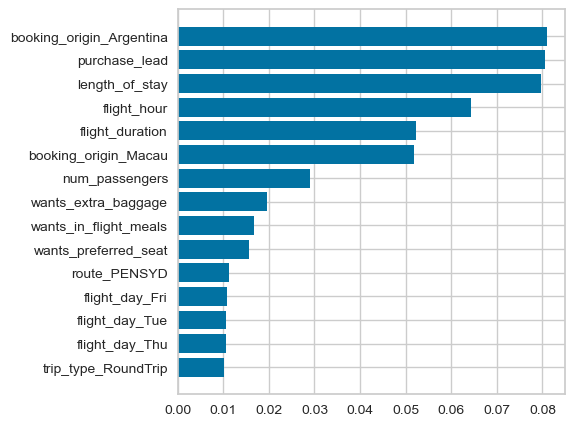

In [400]:
plt.figure(figsize=(5,5))
sorted_idx = RC1.feature_importances_.argsort()[-15:]
plt.barh(df_prep2.iloc[:,:-1].columns[sorted_idx], RC1.feature_importances_[sorted_idx])